<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/MongoDB/MongoDB_%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.mongodb.com/  
https://docs.mongodb.com/manual/  
https://www.mongodb.com/try/download/community


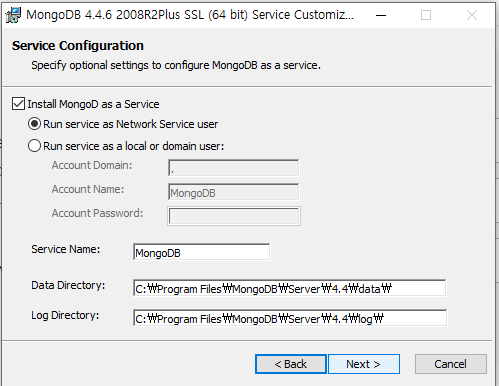

환경변수 - Path - C:\Program Files\MongoDB\Server\4.4\bin

- 복제를 해야 sharding(분할)했다고 함
- config server(환경설정/로그데이터)는 router 기능을 가지고 있음
- S1에 저장한 데이터의 기록지(Chunk/메모리 분할단위)를 S2,S3와 공유
- S1이 죽으면 마스터가 기록지를 가지고 복제셋을 활용해서 복제를 함

- 들쑥날쑥한 데이터 저장
- field(키) < document or BSON({}) < collection({}의 모임) < database
- index : 샤딩할 때 색인하기 위해 사용

**6개의 질의(하나의 쿼리를 명시하는 키워드)**
- 키-값
- 범위 : 비교연산자, $
- 공간 : 거리/주변장소 근사값
- 문자열 탐색 : 논리연산자
- 집합 : 그룹함수
- MR(Map Reduce) : 데이터 가져오기, 공백 기준으로 분철(1), 정렬, 집계

**collection 규칙**
- 자바스크립트라서 대소문자 구분
- 255자 이내로 작성
- $로 시작 불가능
- .연산자/공백 불가능
- 크기가 16M(네트워크 대역폭)까지만 가능
- 대용량(16M 이상)일 경우 GridFS api(대용량 데이터처리 2G까지 가능)를 사용해서 구현

**문서에 대한 정보 : 외부적인 상태**
- mongod.lock : 서버의 프로세스 ID를 저장
- .0 파일(.ns) : 메타데이터를 네임스페이스(2만8천개 정도) 단위로 저장, 하나의 데이터베이스는 컬렉션과 색인수를 2만8천개 가짐
- 파일 용량 늘리기 : test.0(64M), test.1(128M) 식으로 최대 2G까지 늘릴 수 있음
- 데이터 저장소 크기를 정적으로 관리함  
"C:\Program Files\MongoDB\Server\4.4\bin\mongod.exe"  
  --config "C:\Program Files\MongoDB\Server\4.4\bin\mongod.cfg" --service

**문서에 대한 정보 : 내부적인 상태**
- db.stats(1042) : 자료입력 시 몽고 드라이버가 동작된 후 데이터 상태를 확인
- 몽고 드라이버 동작 프로세스
      1. mongodb에 삽입되는 문서의 고유번호 ID인 _id로 필드와 값을 생성
      2. 문서를 mongodb의 bson으로 변환
      3. 네트워크 소켓을 이용해서 데이터베이스를 전달


**WiredTiger**
- Storage Engine

관리자권한으로 cmd 실행 후 아래 실습  
(아래 오타있음)mylog가 아닌 my.log이니 주의  
"c:\data\log\my.log" > "c:\data\cfg\my.cfg"  
"c:\data\mydata"  
"c:\data\cfg\my.cfg"  

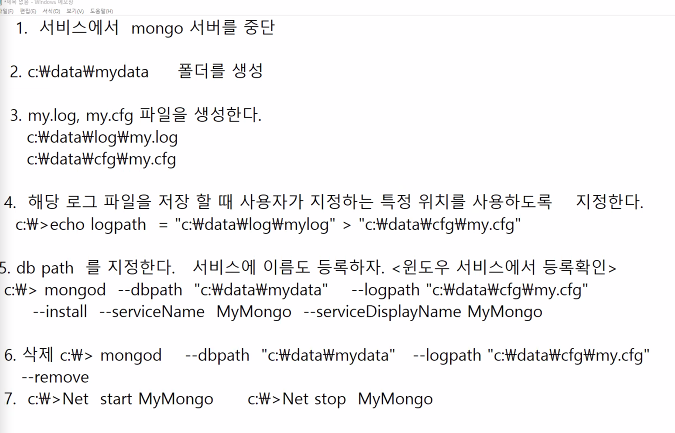

In [ ]:
db.createCollection("exam02");
db.getCollectionNames()  #[ "exam", "exam02" ]
db.my.insert({user_id:"aaa", age:23, status:"A"})
db.my.insert([{user_id:"bbb", age:30, status:"B"},
             {user_id:"ccc", age:35, status:"C"},
             {user_id:"ddd", age:35, status:"D"},
             {user_id:"eee", age:35, status:"E"},
             {user_id:"fff", age:35, status:"F"}]);
db.exam.insert({a:"a"})
db.exam.find()

db.exam02.stats()
db.printCollectionStats()
db.getCollectionInfos({name:"exam02"})

In [ ]:
# save
# _id를 지정하면 : 자료가 있으면 update, 자료가 없으면 insert
# _id를 지정하지 않으면 : insert와 같음

db.nums.save({num:100000})
db.nums.save({num:NumberInt(10000000)})
db.nums.save({num:NumberLong(10000)})
db.nums.find()

db.exam03.save({item:"book", qty:80})
db.exam03.find()
db.exam03.save({_id:1111, item:"book", qty:40})
db.exam03.find()
db.exam03.save({_id:1111, item:"book", qty:70})
db.exam03.insert({_id:1111, item:"book", qty:40})  # 오류남

https://bsonspec.org/spec.html

In [ ]:
db.nums.save({num:NumberInt(10000)})
db.nums.find({num:{$type:16}})  # "\x10" e_name int32

db.nums.save({num:NumberLong(10000)})
db.nums.find({num:{$type:18}})  # "\x12" e_name int64

db.nums.save({num:100000})
db.nums.save({num:98.9})
db.nums.find({num:{$type:1}})  # double

db.nums.save({num:new Date()})
db.nums.find({num:{$type:9}})  # ISODate

db.nums.save({num:new Date()+1})
db.nums.find({num:{$type:2}})  # string

typeof new Date()  # object
typeof new Date()+1  # object1

In [ ]:
db.my.find()
db.my.find({}, {user_id:1, age:1, status:1})
db.my.find({}, {_id:0, user_id:1, age:1, status:1})
db.my.find({}, {user_id:1, age:1})
db.my.find({}, {_id:0, user_id:1, age:1})

db.my.find({status:"A"})  # 조건문

db.my.find({status:"A"}, {_id:0, user_id:1, status:1})  # 조건문과 select

In [ ]:
db.my.updateOne(
   {user_id:"fff"},
   {$set:{status:"G"}}
)

db.my.updateMany(
   {age:{$gte:35}},
   {$set:{status:"K"}}
)

db.my.update({age:{$gt:25}},
             {$set:{status:"C"}},
             {multi:true});  # true가 디폴트, 1개만 바꾸려면 false

https://docs.mongodb.com/manual/reference/operator/query/type/